Dieses Notebook wertet das letzte Modell nach der Feature Importance auf dem Testset aus.

In [1]:
import sys
sys.path.append('../03 - Training')

import numpy as np
from utils.training import get_features_and_labels
import joblib
from sklearn.metrics import classification_report

feature_file = '../03 - Training/features/features.hdf5'
data_split_file = '../03 - Training/data_split.yaml'
split_test = 'test'
model_path = '../03 - Training/models/07-12-25 13-44-13.joblib'
top_n_features = 25
random_state = 42

importance_path = '../03 - Training/output/exp_03_12_feature_importance.joblib'

importance = joblib.load(importance_path)
top_n_features_idx = np.flip(np.argsort(importance['importances_mean']))[:25]

X_test, y_test = get_features_and_labels(feature_file, None, split_test, data_split_file)
X_test = X_test[:, top_n_features_idx]

clf = joblib.load(model_path)
y_pred = clf.predict(X_test)

print(f'Classification report on test set:\n\n{classification_report(y_test, y_pred, digits=4)}')

Extracting features and labels for sessions: 100%|██████████| 268/268 [00:02<00:00, 102.34it/s]


Classification report on test set:

              precision    recall  f1-score   support

           0     0.9491    0.9241    0.9364   1261399
           1     0.6367    0.7286    0.6796    230347

    accuracy                         0.8939   1491746
   macro avg     0.7929    0.8263    0.8080   1491746
weighted avg     0.9009    0.8939    0.8968   1491746



In [1]:
import sys
sys.path.append('../03 - Training')

import joblib
from utils.evaluation import get_iou_for_set
from utils.training import get_features_and_labels
import numpy as np
import matplotlib.pyplot as plt

split_test = 'test'
feature_file = "../03 - Training/features/features.hdf5"
data_split_file = "../03 - Training/data_split.yaml"
features = None
model_path = '../03 - Training/models/07-12-25 13-44-13.joblib'
top_n_features = 25
overlap_treshold_values = np.linspace(0, 1, num = 21)

importance_path = '../03 - Training/output/exp_03_12_feature_importance.joblib'

importance = joblib.load(importance_path)
top_n_features_idx = np.flip(np.argsort(importance['importances_mean']))[:top_n_features]

X_test, y_test = get_features_and_labels(feature_file, None, split_test, data_split_file)
X_test = X_test[:, top_n_features_idx]

precision_values_val = []
recall_values_val = []
f1_values_val = []

clf = joblib.load(model_path)
y_pred_test = clf.predict(X_test)

for overlap_treshold in overlap_treshold_values:
    precision_val, recall_val, f1_val = get_iou_for_set(overlap_treshold, y_pred_test, data_split_file, split_test, feature_file)

    precision_values_val.append(precision_val)
    recall_values_val.append(recall_val)
    f1_values_val.append(f1_val)

Extracting features and labels for sessions: 100%|██████████| 268/268 [00:04<00:00, 66.09it/s]


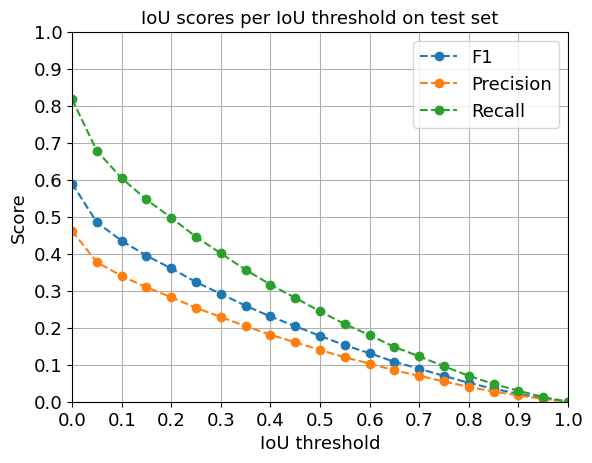

In [2]:
ticks = np.linspace(0, 1, num=11)

plt.xticks(ticks)
plt.yticks(ticks)

plt.plot(overlap_treshold_values, f1_values_val, label='F1', marker='o', linestyle='--')
plt.plot(overlap_treshold_values, precision_values_val, label='Precision', marker='o', linestyle='--')
plt.plot(overlap_treshold_values, recall_values_val, label='Recall', marker='o', linestyle='--')

plt.xlabel('IoU threshold', fontsize=13)
plt.ylabel('Score', fontsize=13)
plt.title('IoU scores per IoU threshold on test set', fontsize=13)
plt.grid(True)
plt.legend(fontsize=13)
plt.tick_params(labelsize=13)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.savefig('output/exp_04_01_iou_f1_testset.pdf', bbox_inches='tight')
plt.show()